## Библиотека transformers

Библиотека Transformers от Hugging Face предоставляет удобные инструменты для работы с предобученными моделями глубокого обучения в задачах обработки естественного языка (NLP). Она поддерживает множество архитектур моделей, таких как BERT, GPT-2, T5 и многие другие, а также предоставляет инструменты для подготовки данных, обучения и оценки моделей.

Основные компоненты библиотеки
- **Модели**: Предобученные модели для различных задач, таких как классификация, генерация текста и вопросы-ответы.
- **Токенизаторы**: Инструменты для предварительной обработки текста, преобразующие текст в формат, подходящий для моделей.
- **Тренер**: Класс Trainer, который упрощает процесс обучения и оценки моделей.

## AutoClasses

AutoClasses в библиотеке Hugging Face Transformers — это автоматизированные классы, которые позволяют пользователям легко загружать и использовать предобученные модели для различных задач в области обработки естественного языка (NLP). Они абстрагируют детали, связанные с конкретными архитектурами моделей, и позволяют разработчикам сосредоточиться на применении модели, а не на её конфигурации.

AutoClasses упрощают процесс выбора и использования моделей, автоматически определяя подходящий класс модели на основе имени модели или конфигурации. Это позволяет избежать необходимости вручную выбирать конкретную модель для каждой задачи, что значительно ускоряет разработку.

AutoClasses для задач NLP:

- **AutoModel**: Базовый класс для загрузки любой модели.
- **AutoModelForSequenceClassification**: Используется для задач классификации - последовательностей, например, для определения тональности текста.
- **AutoModelForTokenClassification**: Предназначен для задач токенизации, - таких как распознавание именованных сущностей.
- **AutoModelForQuestionAnswering**: Для задач, связанных с вопросами и ответами.
- **AutoModelForCausalLM**: Используется для генерации текста.
- **AutoModelForMaskedLM:** Для задач маскированного языкового моделирования.

In [1]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Загрузка предобученной модели и токенизатора
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Подготовка входных данных
text = "I love using Hugging Face's Transformers library!"
inputs = tokenizer(text, return_tensors="pt")

# Получение предсказаний
with torch.no_grad():
    logits = model(**inputs).logits

# Преобразование логитов в вероятности
predicted_class = logits.argmax().item()
print(f"Predicted class: {predicted_class}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Predicted class: 1


**Логиты (logits)** — это необработанные выходные значения (или предсказания) модели перед применением функции активации, такой как softmax. В контексте задач классификации, логиты представляют собой числовые значения, которые соответствуют вероятностям принадлежности входных данных к различным классам, но еще не преобразованы в вероятности.

**Как это работает:**

- **Выход модели:** Когда вы вызываете модель, как в строке кода logits = model
(**inputs).logits, она возвращает логиты для каждого класса. Эти значения могут быть положительными или отрицательными и не ограничены диапазоном (например, от 0 до 1).

- **Функция softmax:** Чтобы получить вероятности из логитов, обычно применяется функция softmax. Эта функция преобразует логиты в вероятности, которые суммируются до 1. Например, если логиты для трех классов равны [2.0, 1.0, 0.1], применение softmax преобразует их в значения вероятностей, которые могут выглядеть как [0.67, 0.25, 0.08].

- **Интерпретация:** Высокий логит для определенного класса указывает на то, что модель считает, что входные данные скорее принадлежат этому классу. Однако сами логиты не могут быть интерпретированы как вероятности, пока они не будут преобразованы.

## AutoTokenizer

- это класс, который автоматически применяет один из видов токенизаторов, которые есть в библиотеке `transformers`. Их не нужно обучать самим - все они уже предобучены на каких-то текстах.

Чтобы подгрузить нужный токенизатор из библиотеки, нам нужен метод:
- `from_pretrained`

Его атрибуты:
- **pretrained_model_name_or_path (str or os.PathLike)**
  - строка-идентификатор модели с *huggingface.co.*
  - путь к директории, где хранятся словари для токенизатора, полученные методом `save_pretrained()`. ***./my_model_directory/***
  - путь или ссылка до файла со словарём в том случае, если токенизатор требует только один словарь (например, Bert или XLNet). ***my_model_directory/vocab.txt.***
- **inputs (additional positional arguments, optional)** — дополнительные аргументы, которые передадутся в класс Tokenizer при инициализации методом __init__().
- **config (PretrainedConfig, optional)** — конфигурационный объект, определяющий, какой класс токенизатора применить.
- **cache_dir (str or os.PathLike, optional)** —  путь до директории, в которую будет кэширована конфигурация загруженной предобученной модели в случае, если нам зачем-то понадобилось определить папку самим вместо стандартной.
- **force_download (bool, optional, defaults to False)** — флаг для принудительной загрузки весов модели и конфигурационных файлов, будут перезаписываться кэшированные версии.
- **proxies (Dict[str, str], optional)** — словарь прокси-серверов, откуда будем грузить веса. Например, {'http': 'foo.bar:3128', 'http://hostname': 'foo.bar:4012'}. Будут использоваться при каждом запросе.
- **revision (str, optional, defaults to "main")** —  указатель конкретной версии модели, которую надо подгрузить. Т.к. все модели на huggingface являются git-based, то указателем может быть branch name, tag name, commit id - любой идентификатор, допустимый гитом.
- **subfolder (str, optional)** —  путь до внутренней папки репозитория модели, если нужные файлы вдруг хранятся там.
- **use_fast (bool, optional, defaults to True)** — использовать ускоренный Rust-based токенизатор, если он доступен для данной модели.
- **tokenizer_type (str, optional)** — тип токенизатора для загрузки.
- **trust_remote_code (bool, optional, defaults to False)** — довериться стороннему коду.
- **kwargs (additional keyword arguments, optional)** — дополнительные аргументы, которые передадутся в токенизатор при инициализации. Здесь можно настроить специальные токены, например, `bos_token`, `eos_token`, `unk_token`, `sep_token`, `pad_token`, `cls_token`, `mask_token`, `additional_special_tokens`. Все параметры можно посмотреть в  __init__().

Тип токенизатора выбирается либо автоматически в зависимости от типа модели, либо можно передать в качестве аргумента. Тип модели берётся из конфигурационного файла модели. Конфигурационный файл, в свою очередь, может быть дефолтный и вся информация о модели будет получена из аргумента `pretrained_model_name_or_path`, либо перезаписана в кастомный конфиг, который передаётся аргументом `config`.

Все типы токенизаторов можно посмотреть в документации: https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoTokenizer.from_pretrained

Для ускоренных Rust-based токенизаторов создали отдельную библиотеку Tokenizers.
Можно использовать и её: https://huggingface.co/docs/tokenizers/index

Метод для создания своего токенизатора:
- `register`

Его атрибуты:
- **config_class (PretrainedConfig)** — конфигурация модели
- **slow_tokenizer_class (PretrainedTokenizer, optional)**
- **fast_tokenizer_class (PretrainedTokenizerFast, optional)**

In [2]:
from transformers import AutoTokenizer

# Download vocabulary from huggingface.co and cache.
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

# Download vocabulary from huggingface.co (user-uploaded) and cache.
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-german-cased")

# If vocabulary files are in a directory (e.g. tokenizer was saved using *save_pretrained('./test/saved_model/')*)
# tokenizer = AutoTokenizer.from_pretrained("./test/bert_saved_model/")

# Download vocabulary from huggingface.co and define model-specific arguments
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base", add_prefix_space=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Data Collators

**Коллаторы данных** — это функции, которые объединяют (или "коллатируют") батчи данных для обучения моделей. Они принимают список примеров и возвращают батч, который может быть передан в модель. Это особенно важно для обработки данных переменной длины, таких как текстовые последовательности.

**Зачем нужны коллаторы?**
- Автоматизация процесса подготовки данных.
- Обработка последовательностей различной длины.
- Упрощение работы с батчами, позволяя использовать разные форматы входных данных.

**Примеры коллаторов данных**

**1. Basic Data Collator**
   - Простой коллатор, который просто объединяет данные в батч.
```python
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
```
   

**2. Data Collator for Language Modeling**
   - Используется для языкового моделирования, добавляет маски для случайных токенов.
```python
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=0.15)
```
   

**3. Data Collator with Padding**
   - Позволяет настроить параметры паддинга.
```python
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding=True)
```

**Как использовать коллаторы?**

Коллаторы обычно используются в процессе создания DataLoader в PyTorch или Trainer.

```python
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, collate_fn=data_collator)
```

## Батчи

Использование батчей данных вместо обучения на всём датасете имеет несколько преимуществ, которые делают этот подход более эффективным и практичным.

1. **Скорость обучения**:
   - Обучение на всём датасете за один раз может занять много времени и потребовать значительных вычислительных ресурсов. Использование батчей позволяет разбить данные на более мелкие части, что ускоряет процесс итерации.

2. **Экономия памяти**:
   - Большие датасеты могут не помещаться в память GPU или RAM. Батчи позволяют загружать и обрабатывать только часть данных в каждый момент времени, что делает обучение возможным даже при ограниченных ресурсах.

3. **Стабильность обновлений весов**:
   - Обучение на батчах данных позволяет использовать стохастический градиентный спуск (SGD) и его варианты, которые помогают избежать переобучения и способствуют более устойчивой сходимости. Обновления весов, основанные на средних значениях градиентов для батча, могут быть более надежными, чем обновления на основе одного примера.

4. **Обобщение**:
   - Батчи помогают улучшить обобщающие способности модели. Изменения в градиентах, основанные на нескольких примерах, могут сделать модель более устойчивой к шуму в данных.

**Как выбрать размер батча**

Выбор размера батча (batch size) является важным аспектом настройки процесса обучения и может зависеть от нескольких факторов:

1. **Ограничения памяти**:
   - Размер батча должен быть таким, чтобы он помещался в память вашего GPU или CPU. Если батч слишком большой, это может привести к ошибке "Out of Memory".

2. **Характеристики модели**:
   - Более сложные модели (например, с большим количеством параметров) могут требовать меньших размеров батча, чтобы избежать переполнения памяти.

3. **Сходимость и стабильность**:
   - Меньшие размеры батча могут привести к более шумным градиентам, что может помочь модели лучше обобщаться, но также может затруднить сходимость. Слишком большие размеры батча могут приводить к переобучению и менее стабильным обновлениям.

4. **Скорость обучения**:
   - Размер батча влияет на скорость обновления весов. Большие батчи могут ускорить обучение, так как они позволяют параллелить вычисления, но могут замедлить сходимость.

**Рекомендации**

- **Начните с небольших размеров батча**: Обычно начинайте с размеров 16, 32 или 64 и постепенно увеличивайте, проверяя, как это влияет на память и производительность модели.
- **Экспериментируйте**: Проведите несколько экспериментов с разными размерами батча, чтобы найти оптимальный для вашей конкретной задачи и доступных ресурсов.
- **Используйте автоматические методы**: Некоторые библиотеки и фреймворки могут автоматически подбирать оптимальный размер батча на основе характеристик вашего оборудования.

## Trainer, TrainingArguments

Класс `Trainer` в библиотеке Hugging Face Transformers предоставляет высокоуровневый интерфейс для обучения и оценки моделей. Он упрощает процесс настройки, обучения и валидации моделей, обеспечивая гибкость и удобство использования.

#### Основные возможности Trainer
- **Упрощение процесса обучения**: Позволяет легко настроить и запустить процесс тренировки.
- **Поддержка различных задач**: Подходит для задач классификации, генерации текста и других задач NLP.
- **Возможности мониторинга**: Поддерживает логирование и визуализацию с помощью TensorBoard.
- **Поддержка распределённого обучения**: Может быть настроен для работы в распределённой среде.

#### Основные компоненты
1. **Модель**: Объект модели, которую нужно обучить.
2. **Датасет**: Объект, содержащий данные для обучения и валидации.
3. **Tokenizer**: Для предварительной обработки текстов.
4. **TrainingArguments**: Класс, в котором задаются параметры обучения, такие как количество эпох, размер батча и т.д.

### Пример использования Trainer

#### 1. Подготовка данных
Сначала необходимо подготовить датасет и токенизировать его. В этом примере используется `datasets` для загрузки и обработки данных.

```python
from datasets import load_dataset
from transformers import AutoTokenizer

# Загрузка датасета
dataset = load_dataset("glue", "mrpc")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Токенизация данных
def tokenize_function(examples):
    return tokenizer(examples["sentence1"], examples["sentence2"], truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)
```

#### 2. Определение модели
Загрузите предобученную модель для классификации последовательностей.

```python
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
```

#### 3. Настройка параметров обучения
Создайте объект `TrainingArguments`, где задаются все необходимые параметры.

```python
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",          # директория для сохранения модели
    evaluation_strategy="epoch",     # стратегия оценки
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
)
```

#### 4. Создание объекта Trainer
Создайте экземпляр `Trainer`, передав модель, аргументы и датасеты.

```python
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)
```

#### 5. Обучение модели
Запустите обучение модели с помощью метода `train()`.

```python
trainer.train()
```

#### 6. Оценка модели
После обучения можно оценить модель с помощью метода `evaluate()`.

```python
eval_results = trainer.evaluate()
print(eval_results)
```

#### 7. Предсказания
Для получения предсказаний можно использовать метод `predict()`.

```python
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.argmax(-1))  # Получение класса с наибольшей вероятностью
```

## Weight Decay

**Weight decay** — это метод регуляризации, используемый для предотвращения переобучения моделей в машинном обучении. Он работает путем добавления штрафа к значению функции потерь, который пропорционален квадрату величины весов модели. Этот штраф заставляет модель избегать слишком больших значений весов, что, в свою очередь, помогает улучшить обобщающую способность модели.

**Почему это важно?**
При обучении моделей часто возникает проблема переобучения, когда модель слишком хорошо запоминает обучающие данные, но плохо работает на новых, невидимых данных. Weight decay помогает справиться с этой проблемой, ограничивая свободу модели в выборе весов и уменьшая её сложность.

### Как работает Weight Decay?

При минимизации функции потерь с использованием градиентного спуска добавляется дополнительный термин к функции потерь:

$
L' = L + \lambda \cdot \|w\|^2
$

где:
- $L$ — исходная функция потерь (например, кросс-энтропия).
- $L'$ — новая функция потерь с добавленным штрафом.
- $\lambda$ — коэффициент регуляризации (weight decay).
- $w$ — вектор весов модели.
- $\|w\|^2$ — норма весов (сумма квадратов весов).

### Примеры использования

```python
import torch
import torch.nn as nn
import torch.optim as optim

# Определение простой нейронной сети
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Определение оптимизатора с weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

# Пример цикла обучения
for epoch in range(100):
    # Ваш код для обучения модели здесь
    # ...
    optimizer.zero_grad()
    # Ваш код для прямого и обратного прохода здесь
    # ...
    optimizer.step()
```

В этом примере weight decay добавляется через параметр `weight_decay` при создании оптимизатора Adam.

### Параметр $\lambda$

Выбор значения $\lambda$ является критически важным. Слишком большое значение может привести к недообучению, так как модель не сможет адекватно обучаться, в то время как слишком малое значение может не оказать заметного влияния на обобщающую способность. Обычно $\lambda$ подбирается с помощью кросс-валидации.

## Pipelines

Пайплайны в библиотеке Hugging Face Transformers представляют собой удобные и простые в использовании интерфейсы для выполнения различных задач обработки естественного языка (NLP). Они абстрагируют детали работы с моделями, позволяя пользователям быстро и легко применять предобученные модели для решения конкретных задач, таких как классификация текста, извлечение информации, генерация текста и многое другое.

### Зачем нужны Пайплайны?

1. **Упрощение работы**: Пайплайны позволяют разработчикам не беспокоиться о низкоуровневых деталях, таких как загрузка моделей и токенизация данных. Они предоставляют высокоуровневый интерфейс, который можно использовать в одной строке кода.
  
2. **Универсальность**: Пайплайны поддерживают множество задач NLP, что делает их универсальным инструментом для работы с текстовыми данными.

3. **Быстрая интеграция**: Пайплайны легко интегрируются в проекты, позволяя разработчикам быстро добавлять функциональность на основе NLP.

### Пайплайны для NLP

В библиотеке Transformers доступны следующие основные пайплайны для NLP:

1. **Классификация текста**
2. **Ответы на вопросы**
3. **Генерация текста**
4. **Извлечение именованных сущностей**
5. **Перевод текста**

### Примеры использования пайплайнов

#### 1. Установка зависимостей

```bash
pip install transformers
```

#### 2. Импорт библиотек

```python
from transformers import pipeline
```

#### 3. Классификация текста

Использование пайплайна для классификации текста:

```python
# Создание пайплайна для классификации текста
classifier = pipeline("text-classification")

# Пример текста для классификации
text = "I love using Hugging Face Transformers!"

# Получение предсказаний
result = classifier(text)
print(result)
```

#### 4. Ответы на вопросы

Использование пайплайна для извлечения ответов на вопросы из текста:

```python
# Создание пайплайна для вопросов и ответов
question_answerer = pipeline("question-answering")

# Пример контекста и вопроса
context = "Hugging Face is creating a tool that democratizes AI."
question = "What is Hugging Face creating?"

# Получение ответа
result = question_answerer(question=question, context=context)
print(result)
```

#### 5. Генерация текста

Использование пайплайна для генерации текста:

```python
# Создание пайплайна для генерации текста
text_generator = pipeline("text-generation")

# Пример начального текста
prompt = "Once upon a time"

# Генерация текста
result = text_generator(prompt, max_length=50, num_return_sequences=1)
print(result)
```

#### 6. Извлечение именованных сущностей

Использование пайплайна для извлечения именованных сущностей из текста:

```python
# Создание пайплайна для распознавания именованных сущностей
ner = pipeline("ner", aggregation_strategy="simple")

# Пример текста
text = "Hugging Face Inc. is based in New York City."

# Получение именованных сущностей
result = ner(text)
print(result)
```

#### 7. Перевод текста

Использование пайплайна для перевода текста:

```python
# Создание пайплайна для перевода
translator = pipeline("translation_en_to_fr")

# Пример текста для перевода
text = "Hugging Face is an AI company."

# Получение перевода
result = translator(text)
print(result)
```

Можно собирать всё в кучу:
```python
classifiсation_pipeline = pipeline('text-classification', model=classifier, tokenizer=tokenizer, device=0)
```

## Evaluate

- библиотека для оценки качества моделей машинного обучения. Имеет множество метрик для разных модальностей (текст, картинки, аудио).

Три режима оценивания:

- **Metric:** просто оценивает работу модели на конкретном датасете.
- **Comparison:** сравнивает качество двух или нескольких моделей на одном датасете и считает их согласованность
- **Measurement:** можно получить более полный аналитический отчёт на основании характеристик датасетов и моделей.

У каждой метрики есть своя карточка, в которой написано, что и как она считает, и как её использовать.

Все карточки можно посмотреть тут: https://huggingface.co/evaluate-metric

In [3]:
!pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00


In [4]:
import evaluate

f1_metric = evaluate.load("f1")
results = f1_metric.compute(predictions=[0, 1], references=[0, 1])
print(results)

{'f1': 1.0}


In [5]:
f1_metric.description

'\nThe F1 score is the harmonic mean of the precision and recall. It can be computed with the equation:\nF1 = 2 * (precision * recall) / (precision + recall)\n'

In [6]:
f1_metric.features

{'predictions': Value(dtype='int32', id=None),
 'references': Value(dtype='int32', id=None)}

In [7]:
# комбинация метрик
clf_metrics = evaluate.combine(["accuracy", "f1", "precision", "recall"])
clf_metrics.compute(predictions=[0, 1, 0], references=[0, 1, 1])

{'accuracy': 0.6666666666666666,
 'f1': 0.6666666666666666,
 'precision': 1.0,
 'recall': 0.5}

In [8]:
# есть ещё evaluator, который работает в связке с pipeline
from transformers import pipeline
from datasets import load_dataset
from evaluate import evaluator
import evaluate

pipe = pipeline("text-classification", model="lvwerra/distilbert-imdb", device=0)
data = load_dataset("imdb", split="test").shuffle().select(range(1000))
metric = evaluate.load("accuracy")

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [9]:
# передаём ему пайплайн модели, данные, метрику и разметку, а дальше он сам
task_evaluator = evaluator("text-classification")

results = task_evaluator.compute(model_or_pipeline=pipe, data=data, metric=metric,
                       label_mapping={"NEGATIVE": 0, "POSITIVE": 1},)

print(results)

{'accuracy': 0.931, 'total_time_in_seconds': 22.513092962999963, 'samples_per_second': 44.41859684244585, 'latency_in_seconds': 0.022513092962999963}


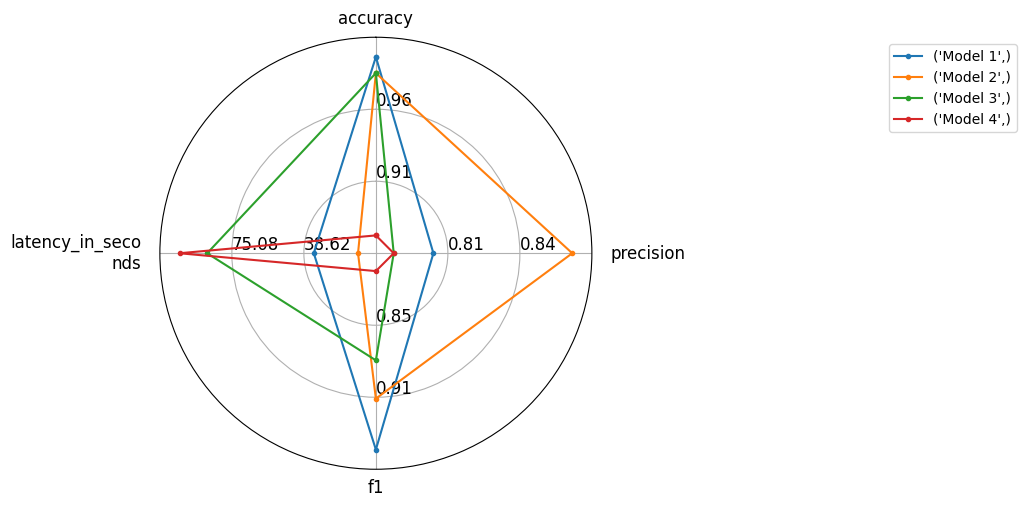

In [10]:
# визуализация радар-плота (сравнение нескольких моделей по нескольким метрикам)
from evaluate.visualization import radar_plot

data = [
   {"accuracy": 0.99, "precision": 0.8, "f1": 0.95, "latency_in_seconds": 33.6},
   {"accuracy": 0.98, "precision": 0.87, "f1": 0.91, "latency_in_seconds": 11.2},
   {"accuracy": 0.98, "precision": 0.78, "f1": 0.88, "latency_in_seconds": 87.6},
   {"accuracy": 0.88, "precision": 0.78, "f1": 0.81, "latency_in_seconds": 101.6}
   ]

model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()

In [11]:
# можно настроить оценку качества сразу по нескольким задачам или нескольким датасетам
import evaluate
from evaluate.evaluation_suite import SubTask

class Suite(evaluate.EvaluationSuite):

    def __init__(self, name):
        super().__init__(name)

        self.suite = [
            SubTask(
                task_type="text-classification",
                data="imdb",
                split="test[:1]",
                args_for_task={
                    "metric": "accuracy",
                    "input_column": "text",
                    "label_column": "label",
                    "label_mapping": {
                        "LABEL_0": 0.0,
                        "LABEL_1": 1.0
                    }
                }
            ),
            SubTask(
                task_type="text-classification",
                data="sst2",
                split="test[:1]",
                args_for_task={
                    "metric": "accuracy",
                    "input_column": "sentence",
                    "label_column": "label",
                    "label_mapping": {
                        "LABEL_0": 0.0,
                        "LABEL_1": 1.0
                    }
                }
            )
        ]

In [12]:
# а можно взять готовые
from evaluate import EvaluationSuite
suite = EvaluationSuite.load('mathemakitten/sentiment-evaluation-suite')
results = suite.run("huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli")

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


README.md:   0%|          | 0.00/5.27k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
results

[{'accuracy': 0.3,
  'total_time_in_seconds': 0.3145626059999813,
  'samples_per_second': 31.790174067926543,
  'latency_in_seconds': 0.03145626059999813,
  'task_name': 'imdb',
  'data_preprocessor': '<function Suite.__init__.<locals>.<lambda> at 0x7986b6138550>'},
 {'accuracy': 0.0,
  'total_time_in_seconds': 0.2248106109999526,
  'samples_per_second': 44.48188613304427,
  'latency_in_seconds': 0.02248106109999526,
  'task_name': 'sst2',
  'data_preprocessor': '<function Suite.__init__.<locals>.<lambda> at 0x7986b61381f0>'}]

## Тензоры в PyTorch

**Что такое тензоры?**

Тензоры — это основная структура данных в PyTorch, аналогичная массивам NumPy, но с дополнительными возможностями для выполнения операций на GPU и поддержкой автоградирования. Тензоры могут иметь любое количество измерений (векторы, матрицы и многомерные массивы), что делает их универсальным инструментом для обработки данных.

### Хранение данных в памяти

**Континуальные и неконтинуальные тензоры**
- **Континуальный тензор**: Это тензор, в котором данные хранятся в непрерывной области памяти. Все элементы следуют друг за другом, что делает доступ к ним быстрым и эффективным.
- **Неконтинуальный тензор**: Это тензор, который не хранит данные в непрерывной области памяти. Это может произойти после операций, таких как `transpose()` или `permute()`, где данные "разворачиваются" или "переупорядочиваются", создавая новый представление существующих данных без изменения их расположения в памяти.

Когда вы выполняете операции на неконтинуальных тензорах, PyTorch может иногда потребовать выделения новой памяти для выполнения операций, что может негативно повлиять на производительность.

**Пример:**
```python
import torch

# Создание тензора
a = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Транспонирование тензора
b = a.t()  # Неконтинуальный тензор
print(b.is_contiguous())  # False

# Приведение к континуальному тензору
c = b.contiguous()
print(c.is_contiguous())  # True
```

### Хранение данных в памяти

PyTorch хранит тензоры в памяти в виде одномерных массивов, которые представляют многомерные структуры данных. Это делается для оптимизации производительности и облегчения выполнения операций. Внутри PyTorch используется система управления памятью, которая эффективно выделяет и освобождает память для тензоров, что позволяет значительно ускорить вычисления.

### Сравнение с NumPy массивами

1. **Тип данных**:
   - **Тензоры**: Поддерживают множество типов данных, включая `float`, `int`, `double`, а также поддерживают работу на GPU.
   - **NumPy массивы**: Также поддерживают разные типы данных, но ограничены CPU.

2. **Автоградирование**:
   - **Тензоры**: PyTorch позволяет легко включать автоматическое вычисление градиентов с помощью атрибута `requires_grad`. Это удобно для обучения моделей.
   - **NumPy массивы**: Не поддерживают автоматическое вычисление градиентов.

3. **Управление памятью**:
   - **Тензоры**: PyTorch использует собственную систему управления памятью, что позволяет эффективно работать с памятью, особенно при использовании GPU.
   - **NumPy массивы**: Используют стандартное управление памятью Python.

4. **Операции на GPU**:
   - **Тензоры**: Позволяют выполнять вычисления на GPU, что значительно ускоряет обработку больших объемов данных.
   - **NumPy массивы**: Ограничены CPU, но существуют библиотеки (например, CuPy), которые обеспечивают аналогичный интерфейс для работы с GPU.